# Ticket Draw
Lottery for Inkogvito training competition.

Pick winner by a logarithmitically scaled probability distribution.

### Imports

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

### Point distribution

In [79]:
dataframe = pd.read_csv('Poengfordeling.csv', delimiter=';')
dataframe

,Unnamed: 0,Sondre Bolland,Rein Undheim,Thea Gjerde,Ragnhild Larsen,Henriette Rebnor,Beatrix Wu,Anton Nydal,Håkon Bleie,Oskar Jahr,Ingeborg Elly Skori-Holm,Sigurd Setså,Benjamin Øygarden,Bendik Micheeff,Vanessa Marie Haaland,Celine Langeland,Alexander Opdahl,Petter Paulsen,Anders Mikkelsen,Emma Bjørkås
0,Januar,230,63.0,88.0,"45,5",58.0,"45,5",21.0,49.0,93.0,55,100,14,90.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Feburar,255,14.0,71.0,"71,5",30.0,151,0.0,4.0,60.0,125,"81,5",20,0.0,50.0,38.0,0.0,0.0,0.0,0.0
2,Mars,"321,5",0.0,99.0,104,0.0,156,0.0,0.0,7.0,"147,5",106,"49,5",118.0,117.0,0.0,85.0,83.0,29.0,22.0
3,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Total,"806,5",77.0,258.0,221,88.0,"352,5",21.0,53.0,160.0,"327,5","287,5","83,5",208.0,167.0,38.0,85.0,83.0,29.0,22.0


In [110]:
def scale_all_points(point_list):
    ticket_list = []
    for points in point_list:
        scaled_points = scale_points(points)
        ticket_list.append(scaled_points)
    return ticket_list

def scale_points(points):
    '''
    Calculates the number of tickets from number of points using a logarithmic scale
    '''
    tickets = log_func(points)
    return tickets
    
def log_func(x):
    return round(np.log10(x) * 100, 1)
    
def plot_tickets_and_points(name_list, point_list, ticket_list):
    for i, name in enumerate(name_list):
        x = point_list[i]
        y = ticket_list[i]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+0.9, y+0.9, name, fontsize=9)
    plt.xlabel("Points") 
    plt.ylabel("Tickets")
    plt.show()
    
def plot_distribution(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    fig = plt.figure(figsize = (12, 5)) 
    
    plt.bar(keys, values,  
        width = 0.4)
    
    plt.xlabel("Contestants") 
    plt.ylabel("Wins") 
    plt.title("Number of wins") 
    plt.show() 
    
def choose_winner(names, tickets, seed=None):
    if seed != None:
        np.random.seed(seed)
    n_participants = len(names)
    total_tickets= np.sum(tickets)
    ticket_probability_distribution = [x / total_tickets for x in tickets]
    
    winner_index = np.random.choice(np.arange(0, n_participants), p=ticket_probability_distribution)
    winner = names[winner_index]
    return winner, winner_index
    
def get_win_distribution(names, tickets, draws=1000):
    winner_list = []
    for i in range(draws):
        winner, winner_index = choose_winner(names, tickets)
        winner_list.append(winner_index)
    number_of_wins = {first_names[i]:winner_list.count(i) for i in winner_list}
    number_of_wins = {k: v for k, v in sorted(number_of_wins.items(), key=lambda item: item[1])}
    return number_of_wins

# Select winner for month

In [125]:
# Enter month name and index
month = 'march'
month_index = 2
seed = 42069

In [126]:
# Fetch names and points for the given month index. Remove all non participants (those with 0 points for the month)
names = list(dataframe.head())[1:]

month_row = dataframe.loc[month_index]
raw_points = list(month_row.values[1:])
raw_points = [float(i.replace(',','.')) if isinstance(i, str) else float(i) for i in raw_points]

names_temp = copy.deepcopy(names)
raw_points_temp = copy.deepcopy(raw_points)

for name, points in zip(names_temp, raw_points_temp):
    if points == 0:
        names.remove(name)
        raw_points.remove(points)
    

first_names = [name.split(' ', 1)[0] for name in names]

Points:
[321.5, 99.0, 104.0, 156.0, 7.0, 147.5, 106.0, 49.5, 118.0, 117.0, 85.0, 83.0, 29.0, 22.0]
Tickets:
[250.7, 199.6, 201.7, 219.3, 84.5, 216.9, 202.5, 169.5, 207.2, 206.8, 192.9, 191.9, 146.2, 134.2]


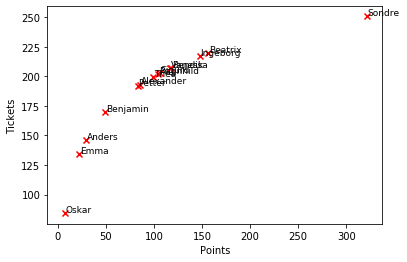

In [127]:
tickets = scale_all_points(raw_points)
print("Points:")
print(raw_points)
print('Tickets:')
print(tickets)

plot_tickets_and_points(first_names, raw_points, tickets)

## Winner distribution with 1 point = 1 ticket (100 000 draws)

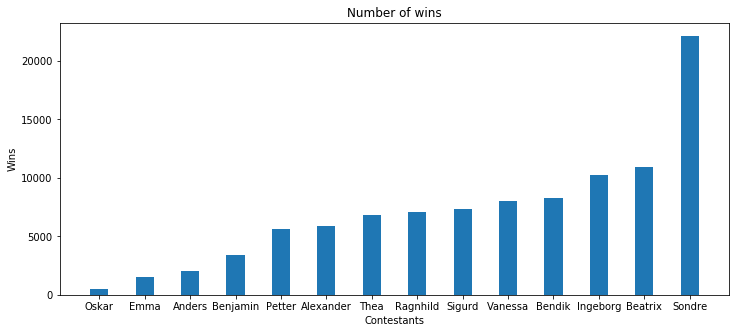

In [131]:
raw_win_distribution = get_win_distribution(names, raw_points, draws=100000)
plot_distribution(raw_win_distribution)

## Winner distribution with scaled tickets (100 000 draws)

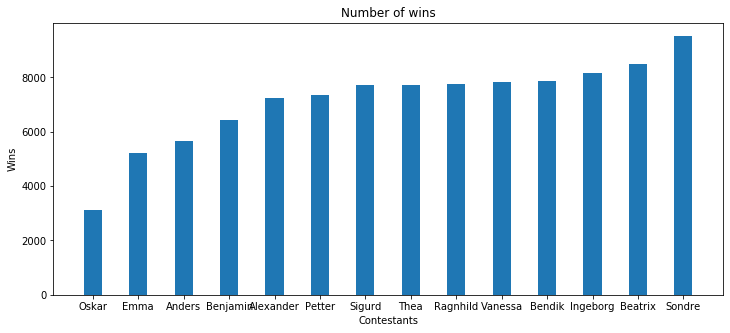

In [132]:
scaled_win_distribution = get_win_distribution(names, tickets, draws=100000)
plot_distribution(scaled_win_distribution)

## Pick Winner

In [130]:
winner, winner_index =  choose_winner(names, tickets, seed=seed)
print(f'The winner of {month} is {winner}')

The winner of march is Sondre Bolland
